In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import nltk
import statsmodels.api as sm

# for creating ridge plot
from scipy.stats.kde import gaussian_kde
from scipy.stats import norm


import draft_prepare as prepare

mpl.style.use('seaborn')

In [ ]:
# title 20
# axis labels 18
# tick labels 14
# figsize 13-7

In [2]:
# df = pd.read_csv('../songs_0526.csv').drop(columns=['Unnamed: 0'])
# df = draft_prepare.clean_df(df)
# df = df.set_index('date')
# df = df[(df.decade != 1950) & (df.decade != 2020)]

In [3]:
# df['decade'] = pd.Categorical(df.decade, categories=[1960, 1970, 1980, 1990, 2000, 2010], ordered=True)

In [70]:
df = prepare.get_data('../songs_0526.csv')

Features added ******************


In [73]:
df.date = pd.to_datetime(df.date)
df = df.set_index('date')

In [74]:
df.index

DatetimeIndex(['2001-10-20', '1974-12-21', '2013-05-25', '2014-03-15',
               '2013-04-06', '2015-10-10', '2002-10-26', '1982-02-27',
               '1961-10-16', '1985-03-16',
               ...
               '1997-02-01', '1969-09-06', '1997-06-14', '2009-06-13',
               '2000-07-01', '1970-03-28', '1960-12-19', '2003-07-26',
               '1999-05-22', '2008-01-12'],
              dtype='datetime64[ns]', name='date', length=23762, freq=None)

In [75]:
df.head(3)

title                         artist  \
date                                                    
2001-10-20          #1                          Nelly   
1974-12-21    #9 Dream                    John Lennon   
2013-05-25  #Beautiful  Mariah Carey Featuring Miguel   

                                                       lyrics  \
date                                                            
2001-10-20  uh uh uh got bring attention dirty better watc...   
1974-12-21  long ago dream dream know yes know seemed real...   
2013-05-25  ah ah beautiful ah ah beautiful hop back bike ...   

                                                   raw_lyrics  decade  \
date                                                                    
2001-10-20  #1 LyricsUh uh uh I just gotta bring it to the...    2000   
1974-12-21  #9 Dream Lyrics[Verse 1] So long ago Was it in...    1970   
2013-05-25  #Beautiful Lyrics[Intro: Mariah Carey] Ah, ah,...    2010   

            character_count  word_count  \
date                                      
2001-10-20             2014         363   
1974-12-21              842         135   
2013-05-25              768         129   

                                                 unique_words  \
date                                                            
2001-10-20  better stitch cocky dock til shorties total ye...   
1974-12-21  whispered soul dancing somebody warm ago air s...   
2013-05-25  always beautiful take til let darling middle y...   

            unique_words_count  sentiment  ...  \
date                                       ...   
2001-10-20                 228     0.9915  ...   
1974-12-21                  49     0.9169  ...   
2013-05-25                  54     0.9989  ...   

                                                  place_words chorus_count  \
date                                                                         
2001-10-20                               [hook] [hook] [hook]            0   
1974-12-21  [verse 1] [pre-chorus 1] [chorus] [verse 2] [p...            2   
2013-05-25  [intro: mariah carey] [verse 1: miguel] [choru...            2   

            verse_count  verse_chorus_ratio  pre_chorus_count  outro_count  \
date                                                                         
2001-10-20            0                 0.0                 0            0   
1974-12-21            2                 1.0                 2            1   
2013-05-25            2                 1.0                 0            1   

            bridge_count  hook_count  \
date                                   
2001-10-20             0           3   
1974-12-21             0           0   
2013-05-25             0           0   

                                                      bigrams  \
date                                                            
2001-10-20  [(uh, uh), (uh, uh), (uh, got), (got, bring), ...   
1974-12-21  [(long, ago), (ago, dream), (dream, dream), (d...   
2013-05-25  [(ah, ah), (ah, beautiful), (beautiful, ah), (...   

                                                     trigrams  
date                                                           
2001-10-20  [(uh, uh, uh), (uh, uh, got), (uh, got, bring)...  
1974-12-21  [(long, ago, dream), (ago, dream, dream), (dre...  
2013-05-25  [(ah, ah, beautiful), (ah, beautiful, ah), (be...  

[3 rows x 21 columns]

In [76]:
df2 = df.copy()
df2['positive_or_negative'] = np.where(df2.sentiment > 0, 'positive', 'negative')
df2['positive'] = np.where(df2.positive_or_negative == 'positive', True, False)
df2['negative'] = np.where(df2.positive_or_negative == 'negative', True, False)
df2.head(2)

title       artist  \
date                                
2001-10-20        #1        Nelly   
1974-12-21  #9 Dream  John Lennon   

                                                       lyrics  \
date                                                            
2001-10-20  uh uh uh got bring attention dirty better watc...   
1974-12-21  long ago dream dream know yes know seemed real...   

                                                   raw_lyrics  decade  \
date                                                                    
2001-10-20  #1 LyricsUh uh uh I just gotta bring it to the...    2000   
1974-12-21  #9 Dream Lyrics[Verse 1] So long ago Was it in...    1970   

            character_count  word_count  \
date                                      
2001-10-20             2014         363   
1974-12-21              842         135   

                                                 unique_words  \
date                                                            
2001-10-20  better stitch cocky dock til shorties total ye...   
1974-12-21  whispered soul dancing somebody warm ago air s...   

            unique_words_count  sentiment  ... verse_chorus_ratio  \
date                                       ...                      
2001-10-20                 228     0.9915  ...                0.0   
1974-12-21                  49     0.9169  ...                1.0   

           pre_chorus_count  outro_count  bridge_count  hook_count  \
date                                                                 
2001-10-20                0            0             0           3   
1974-12-21                2            1             0           0   

                                                      bigrams  \
date                                                            
2001-10-20  [(uh, uh), (uh, uh), (uh, got), (got, bring), ...   
1974-12-21  [(long, ago), (ago, dream), (dream, dream), (d...   

                                                     trigrams  \
date                                                            
2001-10-20  [(uh, uh, uh), (uh, uh, got), (uh, got, bring)...   
1974-12-21  [(long, ago, dream), (ago, dream, dream), (dre...   

            positive_or_negative  positive negative  
date                                                 
2001-10-20              positive      True    False  
1974-12-21              positive      True    False  

[2 rows x 24 columns]

In [77]:
def get_sentiment_category(sentiment_score):
    if sentiment_score < -.75:
        return 'very negative'
    elif sentiment_score < -.25:
        return 'somewhat negative'
    elif sentiment_score < .25:
        return 'neutral'
    elif sentiment_score < .75:
        return 'somewhat positive'
    else:
        return 'very positive'
    
df2['sentiment_category'] = df2.sentiment.apply(get_sentiment_category)
df2['sentiment_category'] = pd.Categorical(df2.sentiment_category, 
                                          categories=['very negative', 'somewhat negative', 'neutral', 
                                                      'somewhat positive', 'very positive'], 
                                          ordered=True)

In [78]:
def get_sentiment_category_2(sentiment_score):
    if sentiment_score < -.75:
        return 'very negative'
    elif sentiment_score < .75:
        return 'mid-range'
    else:
        return 'very positive'
    
df2['sentiment_category_2'] = df2.sentiment.apply(get_sentiment_category_2)
df2['sentiment_category_2'] = pd.Categorical(df2.sentiment_category_2, 
                                             categories=['very negative', 'mid-range', 'very positive'],
                                             ordered=True)

# def get_sentiment_category_3(sentiment_score):
#     if sentiment_score < -.75:
#         return 'very negative'
#     elif sentiment_score < .75:
#         return None
#     else:
#         return 'very postiive'

# df2['sentiment_category_3'] = df2.sentiment.apply(get_sentiment_category_3)
# df2['sentiment_category_3'] = pd.Categorical(df2.sentiment_category_3,
#                                              categories=['very negative', 'very_positive'],
#                                              ordered=True)

In [79]:
plot_df = data=df2.groupby('decade').sentiment_category_2.value_counts(normalize = True).unstack()
plot_df

very negative  mid-range  very positive
decade                                         
1950         0.100580   0.143133       0.756286
1960         0.103546   0.159151       0.737303
1970         0.110446   0.149090       0.740464
1980         0.133666   0.143927       0.722407
1990         0.158263   0.124650       0.717087
2000         0.190852   0.128076       0.681073
2010         0.260815   0.131283       0.607902
2020         0.361353   0.124638       0.514010

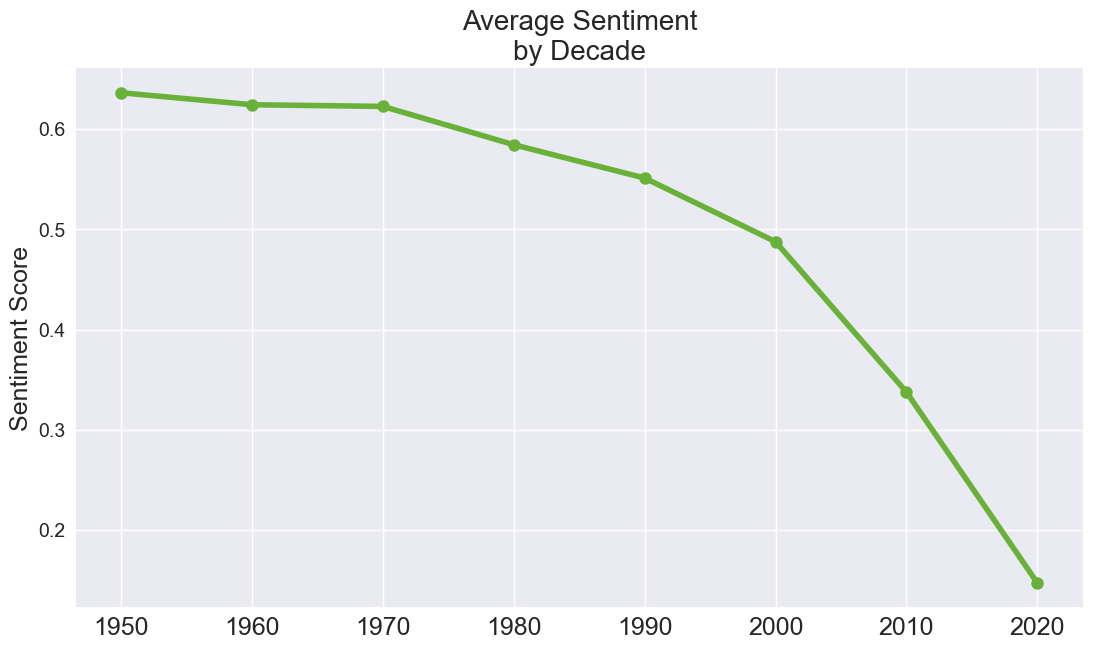

In [117]:
def sentiment_lineplot(df):
    mpl.style.use('seaborn')
    plt.figure(figsize=(13,7))
    df.groupby('decade').mean().sentiment.plot(marker='.',
                                               markersize=18,
                                               color='#69b138', #(green)
                                               linewidth=4
                                              )
    plt.title('Average Sentiment\nby Decade', fontsize=20)
    plt.xlabel(None)
    plt.xticks(fontsize=18)
    plt.ylabel('Sentiment Score', fontsize=18)
    plt.yticks(fontsize=14)
    plt.show()
    
sentiment_lineplot(df)


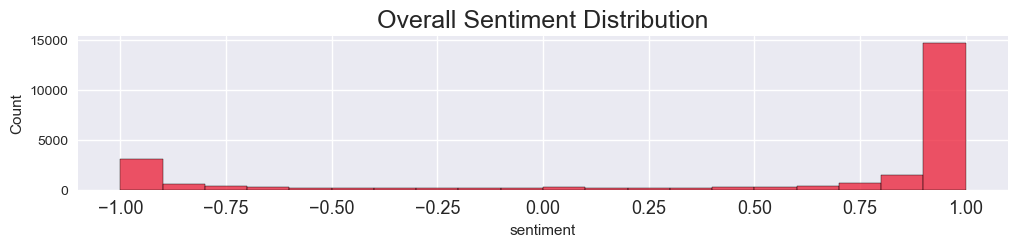

In [115]:
def sentiment_histplot(df):
    plt.figure(figsize=(12,2))
    sns.histplot(df.sentiment, 
                 bins=20, 
                 color='#ec1c34', #(red)
                )
    plt.title('Overall Sentiment Distribution', fontsize=18)
    plt.xticks(fontsize=13)
    plt.show()
    
sentiment_histplot(df)

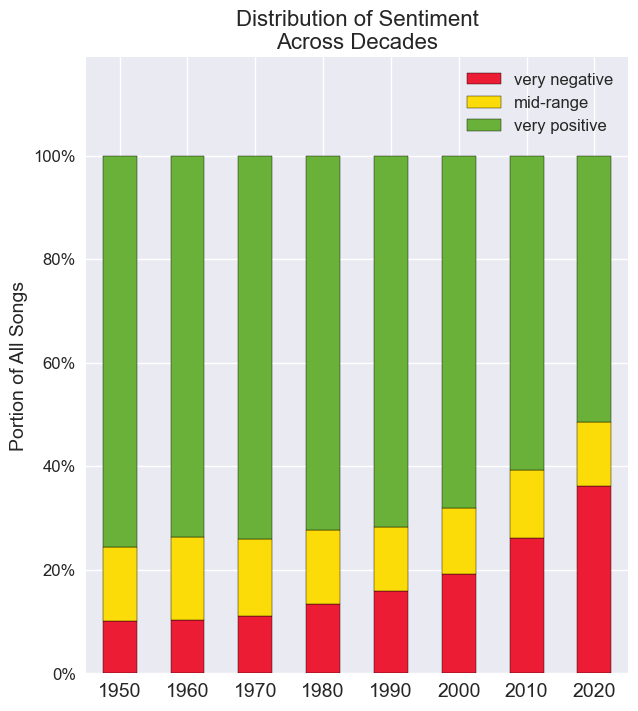

In [119]:
def sentiment_stacked_bar(df):
    plt.style.use('seaborn')

    from matplotlib.colors import ListedColormap
    cmap = ListedColormap([
                            '#ec1c34', #(red)
                            '#fbdb08', #(yellow)
                            '#69b138' #(green)
                           ])

    (
        df2.groupby('decade')
         .sentiment_category_2
         .value_counts(normalize = True)
         .unstack()
         .plot(kind='bar',
               stacked=True,
               cmap=cmap,
               ec='black',
               figsize=(7, 8),
               )
    )
    plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
    plt.title('Distribution of Sentiment\nAcross Decades', fontsize=16)
    plt.ylabel('Portion of All Songs', fontsize=14)
    plt.yticks(fontsize=12)
    plt.xlabel(None)
    plt.xticks(rotation=0, fontsize=14)
    plt.legend(
                #bbox_to_anchor=(1,1), 
                fontsize=12
                )
    plt.ylim(0, 1.19)
    plt.show()
    
sentiment_stacked_bar(df)


In [83]:
px.line(df[['sentiment']].resample('Y').mean().dropna())

In [84]:
px.line(df['sentiment'].resample('Y').mean().dropna())
px.line(df['sentiment'].resample('Y').mean().rolling(3).mean().dropna())


<AxesSubplot:xlabel='date'>

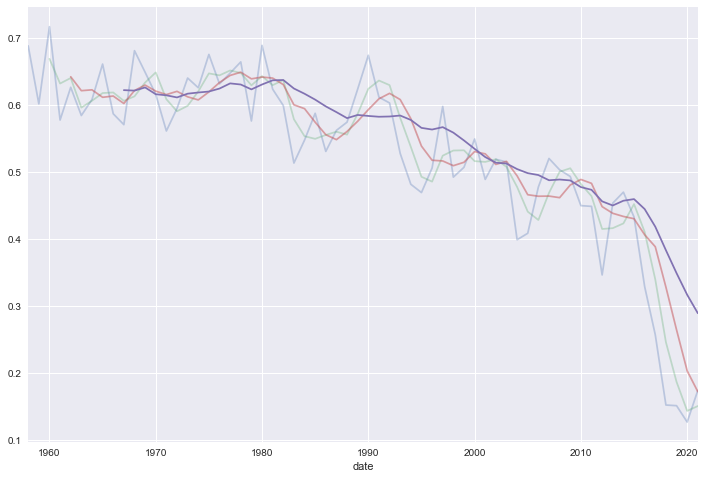

In [85]:
plt.figure(figsize=(12,8))
df['sentiment'].resample('Y').mean().dropna().plot(alpha=.3)
df['sentiment'].resample('Y').mean().rolling(3).mean().dropna().plot(alpha=.3)
df['sentiment'].resample('Y').mean().rolling(5).mean().dropna().plot(alpha=.5)
df['sentiment'].resample('Y').mean().rolling(10).mean().dropna().plot()

In [86]:
df[(df.index < pd.to_datetime('1960'))]

title               artist  \
date                                                                        
1959-08-17                       ('til) I Kissed You  The Everly Brothers   
1958-12-22          (All of a Sudden) My Heart Sings            Paul Anka   
1959-02-02  (I'll Be With You In) Apple Blossom Time           Tab Hunter   
1959-11-02         (If You Cry) True Love, True Love         The Drifters   
1958-08-04       (It's Been A Long Time) Pretty Baby          Gino & Gina   
...                                              ...                  ...   
1959-08-31                      You're Gonna Miss Me       Connie Francis   
1958-08-04                   You're Making A Mistake         The Platters   
1958-08-04              Young And Warm And Wonderful         Tony Bennett   
1958-09-22                         Young School Girl          Fats Domino   
1958-09-08                       Your Cheatin' Heart   George Hamilton IV   

                                                       lyrics  \
date                                                            
1959-08-17  never felt like kissed ya exist kissed ya neve...   
1958-12-22  secret way hold hand let know understand wind ...   
1959-02-02  apple blossom time change name mine one day ma...   
1959-11-02  bom bom bom bom bom bom bom bom bom bom bom bo...   
1958-08-04  pretty baby gino gina long time cryin love kee...   
...                                                       ...   
1959-08-31  one kiss one little sigh gave said goodbye som...   
1958-08-04  making mistake ahelp ahelp love making mistake...   
1958-08-04  young warm wonderful dreamed would dream seeme...   
1958-09-22  hey little school girl wake sleepy head come l...   
1958-09-08  cheatin heart make weep cry cry try sleep slee...   

                                                   raw_lyrics  decade  \
date                                                                    
1959-08-17  (’Til) I Kissed You Lyrics[Verse] Never felt l...    1950   
1958-12-22  (All of a Sudden) My Heart Sings LyricsThe sec...    1950   
1959-02-02  (I’ll Be With You In) Apple Blossom Time Lyric...    1950   
1959-11-02  (If You Cry) True Love, True Love LyricsBom, b...    1950   
1958-08-04  (It’s Been A Long Time) Pretty Baby Lyrics(It'...    1950   
...                                                       ...     ...   
1959-08-31  You’re Gonna Miss Me LyricsOne kiss, one littl...    1950   
1958-08-04  You’re Making a Mistake LyricsYou're making a ...    1950   
1958-08-04  Young And Warm And Wonderful LyricsYoung and w...    1950   
1958-09-22  Young School Girl LyricsHey, little school gir...    1950   
1958-09-08  Your Cheatin’ Heart LyricsYour cheatin' heart ...    1950   

            character_count  word_count  \
date                                      
1959-08-17              559         108   
1958-12-22              498          81   
1959-02-02              281          48   
1959-11-02              424          93   
1958-08-04              248          45   
...                     ...         ...   
1959-08-31              377          67   
1958-08-04              146          24   
1958-08-04              262          41   
1958-09-22              318          51   
1958-09-08              249          45   

                                                 unique_words  \
date                                                            
1959-08-17  live way uhhuh til yeah knew felt exist got mi...   
1958-12-22  way hand heart upon gleaming touch darling let...   
1959-02-02  apple wedding chime bell day may come today wo...   
1959-11-02  die heart take darling would knew cry caused t...   
1958-08-04  parted hand get eakup take denying please keep...   
...                                                       ...   
1959-08-31  goodbye sigh someday heart darling yeah gone a...   
1958-08-04  help oh made lie told mistake though darling m...   
1958-08-04  heart warm would last seeme

In [87]:
df.index


DatetimeIndex(['2001-10-20', '1974-12-21', '2013-05-25', '2014-03-15',
               '2013-04-06', '2015-10-10', '2002-10-26', '1982-02-27',
               '1961-10-16', '1985-03-16',
               ...
               '1997-02-01', '1969-09-06', '1997-06-14', '2009-06-13',
               '2000-07-01', '1970-03-28', '1960-12-19', '2003-07-26',
               '1999-05-22', '2008-01-12'],
              dtype='datetime64[ns]', name='date', length=23762, freq=None)

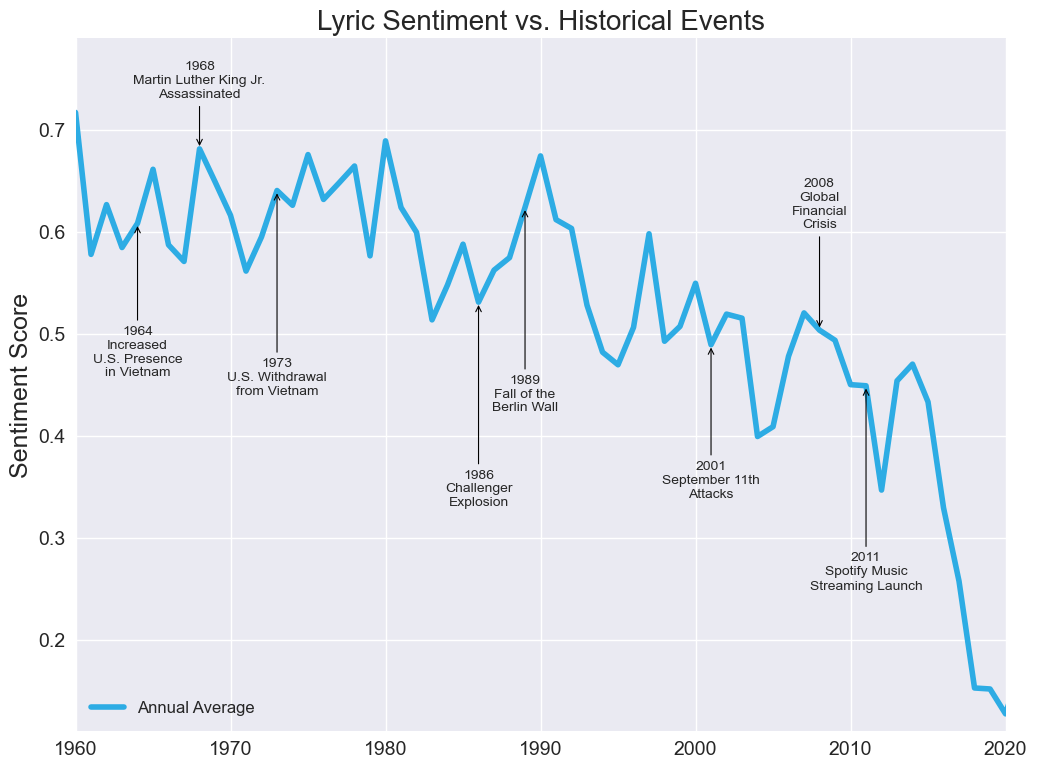

In [113]:
def historical_lineplot(df):
        
    df3 = df['sentiment'].resample('Y').mean().dropna()
    df3.index.freq = None

    mpl.style.use('seaborn')
    plt.figure(figsize=(12,9))

    df3.plot(label='Annual Average', 
             color='#2dace4', #(blue)
             linewidth='4'
            )

    plt.title('Lyric Sentiment vs. Historical Events', fontsize=20)
    plt.ylabel('Sentiment Score', fontsize=18)
    plt.yticks(fontsize=14)
    plt.xlabel(None)
    plt.xticks(fontsize=14)
    plt.xlim(pd.to_datetime('1960'), pd.to_datetime('2020'))
    plt.ylim(.11, .79)

    arrowprops = {
                  'arrowstyle': '->',
                  'linewidth': .8,
                  'facecolor': 'black',
                  #'relpos': (0,1)
                 }



    # 1964: Increased Presence in Vietnam
    plt.annotate('1964\nIncreased\nU.S. Presence\nin Vietnam', 
                 xy=(
                     pd.to_datetime('1964'), 
                     df3[df3.index == pd.to_datetime('1964-12-31')].values[0]
                     ), 
                 xytext=(
                         pd.to_datetime('1964'), 
                         df3[df3.index == pd.to_datetime('1964-12-31')].values[0] - .15
                         ),
                 ha='center',
                 arrowprops=arrowprops
                )

    # 1968: Martin Luther King Assassinated
    plt.annotate('1968\nMartin Luther King Jr.\nAssassinated', 
                 xy=(
                     pd.to_datetime('1968'), 
                     df3[df3.index == pd.to_datetime('1968-12-31')].values[0]
                     ), 
                 xytext=(
                         pd.to_datetime('1968'), 
                         df3[df3.index == pd.to_datetime('1968-12-31')].values[0] + .05
                         ),
                 ha='center',
                 arrowprops=arrowprops
                )

    # 1973: US. Withdrawal from Vietnam
    plt.annotate('1973\nU.S. Withdrawal\nfrom Vietnam', 
                 xy=(
                     pd.to_datetime('1973'), 
                     df3[df3.index == pd.to_datetime('1973-12-31')].values[0]
                     ), 
                 xytext=(
                         pd.to_datetime('1973'), 
                         df3[df3.index == pd.to_datetime('1973-12-31')].values[0] - .2
                         ),
                 ha='center',
                 arrowprops=arrowprops
                )


    # 1986 Challenger Explosion
    plt.annotate('1986\nChallenger\nExplosion', 
                 xy=(
                     pd.to_datetime('1986'), 
                     df3[df3.index == pd.to_datetime('1986-12-31')].values[0]
                     ), 
                 xytext=(
                         pd.to_datetime('1986'), 
                         df3[df3.index == pd.to_datetime('1986-12-31')].values[0] - .2
                         ),
                 ha='center',
                 arrowprops=arrowprops
                )

    # 1989 Fall of the Berlin Wall
    plt.annotate('1989\nFall of the\nBerlin Wall', 
                 xy=(
                     pd.to_datetime('1989'), 
                     df3[df3.index == pd.to_datetime('1989-12-31')].values[0]
                     ), 
                 xytext=(
                         pd.to_datetime('1989'), 
                         df3[df3.index == pd.to_datetime('1989-12-31')].values[0] - .2
                         ),
                 ha='center',
                 arrowprops=arrowprops
                )

    # 2001: September 11th Attacks
    plt.annotate('2001\nSeptember 11th\nAttacks', 
                 xy=(
                     pd.to_datetime('2001'), 
                     df3[df3.index == pd.to_datetime('2001-12-31')].values[0]
                     ), 
                 xytext=(
                         pd.to_datetime('2001'), 
                         df3[df3.index == pd.to_datetime('2001-12-31')].values[0] - .15
                         ),
                 ha='center',
                 arrowprops=arrowprops
                )

    # 2008: Global Financial Crisis
    plt.annotate('2008\nGlobal\nFinancial\nCrisis', 
                 xy=(
                     pd.to_datetime('2008'), 
                     df3[df3.index == pd.to_datetime('2008-12-31')].values[0]
                     ), 
                 xytext=(
                         pd.to_datetime('2008'), 
                         df3[df3.index == pd.to_datetime('2008-12-31')].values[0] + .1
                         ),
                 ha='center',
                 arrowprops=arrowprops
                )

    # 2011: Spotify Launch and the Rise of Streaming
    plt.annotate('2011\nSpotify Music\nStreaming Launch', 
                 xy=(
                     pd.to_datetime('2011'), 
                     df3[df3.index == pd.to_datetime('2011-12-31')].values[0]
                     ), 
                 xytext=(
                         pd.to_datetime('2011'), 
                         df3[df3.index == pd.to_datetime('2011-12-31')].values[0] - .2
                         ),
                 ha='center',
                 arrowprops=arrowprops
                )

    plt.legend(fontsize=12, loc='lower left')
    plt.show()
    
historical_lineplot(df)

In [90]:
px.line(df[['sentiment']].resample('10Y').mean().dropna(), markers=True)

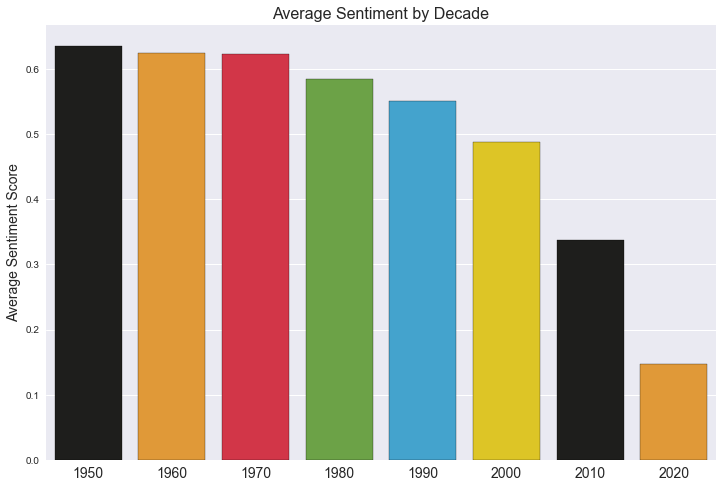

In [91]:
def sentiment_barplot(df):

    mpl.style.use('seaborn')
    
    palette = [
        '#1f1e1b', #(black)
        '#fc9d1c', #(orange)
        '#ec1c34', #(red)
        '#69b138', #(green)
        '#2dace4', #(blue)
        '#fbdb08' #(yellow)
        ]

    plt.figure(figsize=(12,8))
    sns.barplot(data=df, y='sentiment', x='decade', ci=None, ec='black',
                palette=palette)
    plt.title('Average Sentiment by Decade', fontsize=16)
    plt.ylabel('Average Sentiment Score', fontsize=14)
    plt.xlabel(None)
    plt.xticks(fontsize=14)
    plt.show()
        
sentiment_barplot(df)

In [92]:
def sentiment_lineplot(df):
    
    df2 = df.resample('10Y').mean()
    mpl.style.use('seaborn')
    plt.figure(figsize=(12,8))
    

In [93]:
def sentiment_area_plot(df):
    
    # set matplotlib visualization style
    mpl.style.use('default')
    # set custom colormap with Billboard brand colors
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap([
                            '#ec1c34', #(red)
                            '#fc9d1c', #(orange)
                            '#fbdb08', #(yellow)
                            '#2dace4', #(blue)
                            '#69b138' #(green)
                           ])
    # create the plot
    ax = (df.groupby('sentiment_category_3')['sentiment']
               .resample('Y')
               .size()
               .unstack(0)
               .apply(lambda row: row / row.sum(), axis=1)
               .plot.area(figsize=(12,8), colormap=cmap, alpha=.75))
    ax.legend(loc='upper right', bbox_to_anchor=(1,.95))
    plt.title('Distribution of Sentiment Over Time', fontsize=16)
    plt.ylabel('Percent of Songs in that Year', fontsize=14)
    plt.xlabel('Year', fontsize=14)
    plt.ylim(0, 1)
    plt.gca().yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1.0))
    plt.show()
    
sentiment_area_plot(df2)

KeyError: 'sentiment_category_3'

In [94]:
q1, q3 = df['sentiment'].quantile([.25, .75])
q1, q3

(0.3182, 0.992)

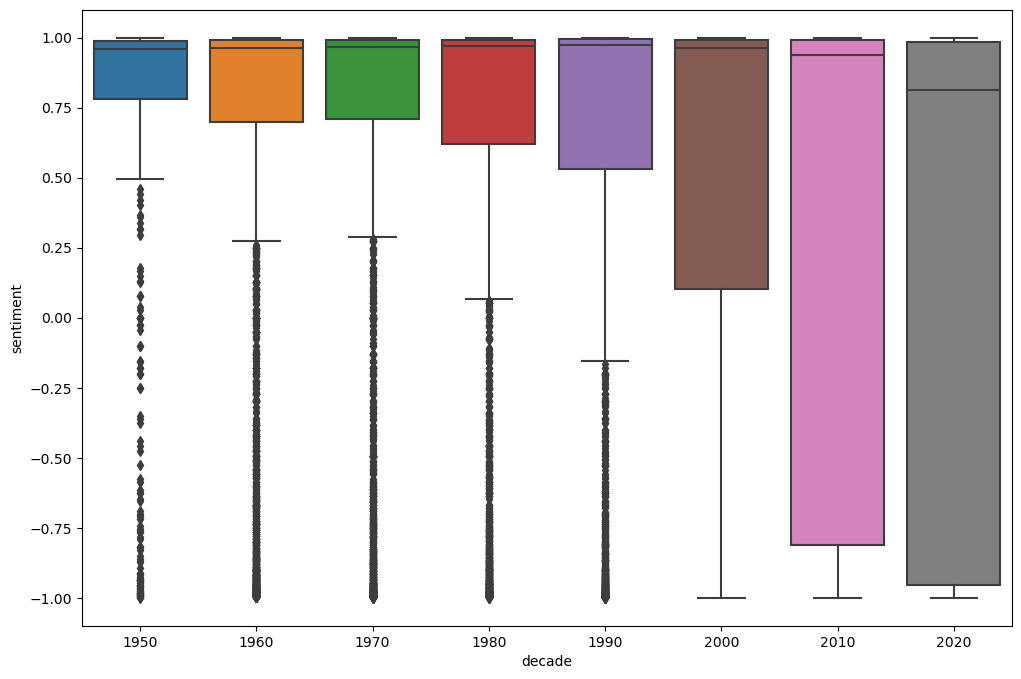

In [95]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='decade', y='sentiment')
plt.show()

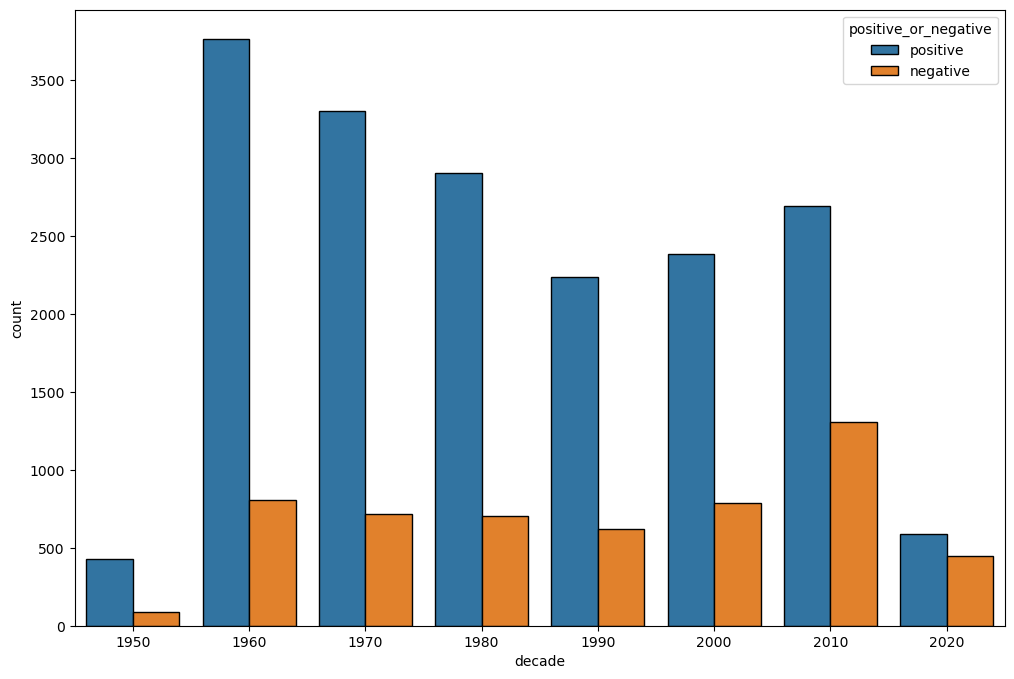

In [96]:
# count of positive vs negative
plt.figure(figsize=(12,8))
sns.countplot(data=df2, x='decade', hue='positive_or_negative', ec='black')
plt.show()

In [97]:
df3 = df2.groupby('decade').sentiment_category.value_counts(normalize=True).unstack()
df3

very negative  somewhat negative   neutral  somewhat positive  \
decade                                                                  
1950         0.100580           0.038685  0.052224           0.052224   
1960         0.103546           0.049694  0.041375           0.068082   
1970         0.110446           0.044877  0.037896           0.066318   
1980         0.133666           0.046589  0.031614           0.065724   
1990         0.158263           0.041667  0.030812           0.052171   
2000         0.190852           0.040063  0.026498           0.061514   
2010         0.260815           0.048012  0.032508           0.050763   
2020         0.361353           0.040580  0.039614           0.044444   

        very positive  
decade                 
1950         0.756286  
1960         0.737303  
1970         0.740464  
1980         0.722407  
1990         0.717087  
2000         0.681073  
2010         0.607902  
2020         0.514010

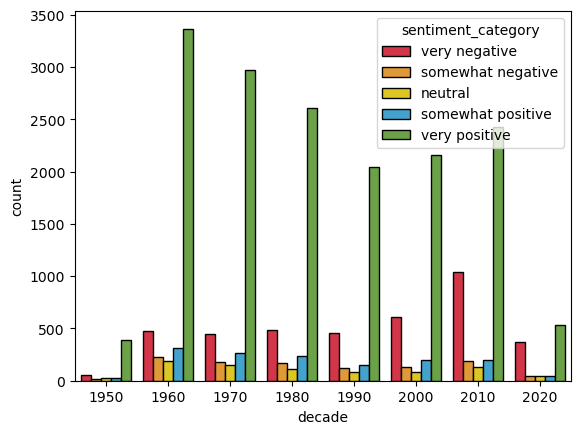

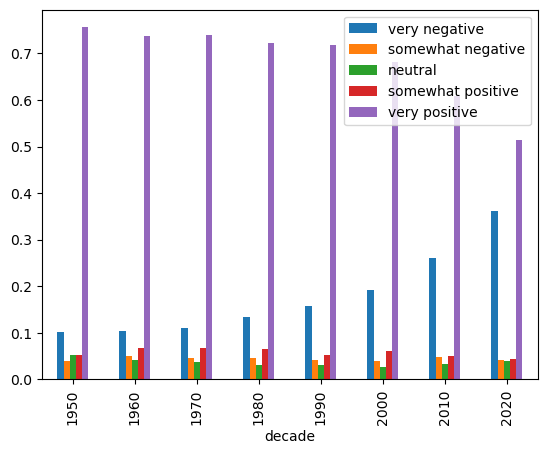

In [98]:
palette = [
'#ec1c34', #(red)
'#fc9d1c', #(orange)
'#fbdb08', #(yellow)
'#2dace4', #(blue)
'#69b138' #(green)
]

#plt.figure(figsize=(12,8))
sns.countplot(data=df2, x='decade', hue='sentiment_category', ec='black', palette=palette)
plt.show()

df2.groupby('decade').sentiment_category.value_counts(normalize = True).unstack().plot(kind = 'bar')
plt.show()

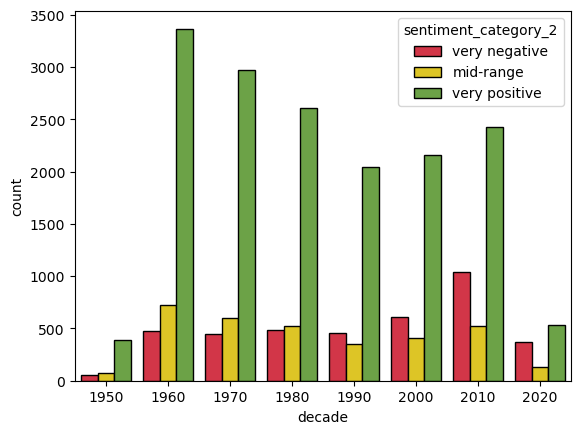

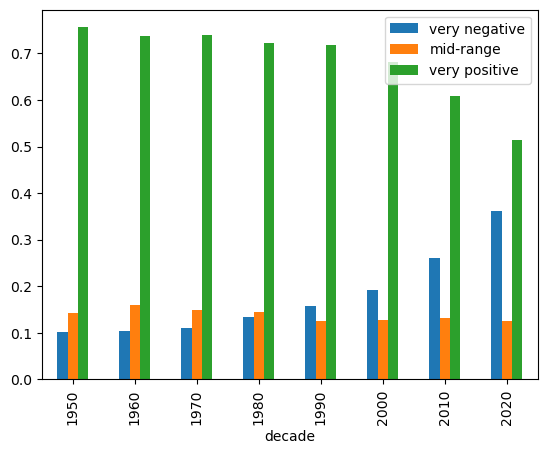

In [99]:
palette = [
'#ec1c34', #(red)
'#fbdb08', #(yellow)
'#69b138' #(green)
]

#plt.figure(figsize=(12,8))
sns.countplot(data=df2, x='decade', hue='sentiment_category_2', ec='black', palette=palette)
plt.show()

df2.groupby('decade').sentiment_category_2.value_counts(normalize = True).unstack().plot(kind = 'bar')
plt.show()

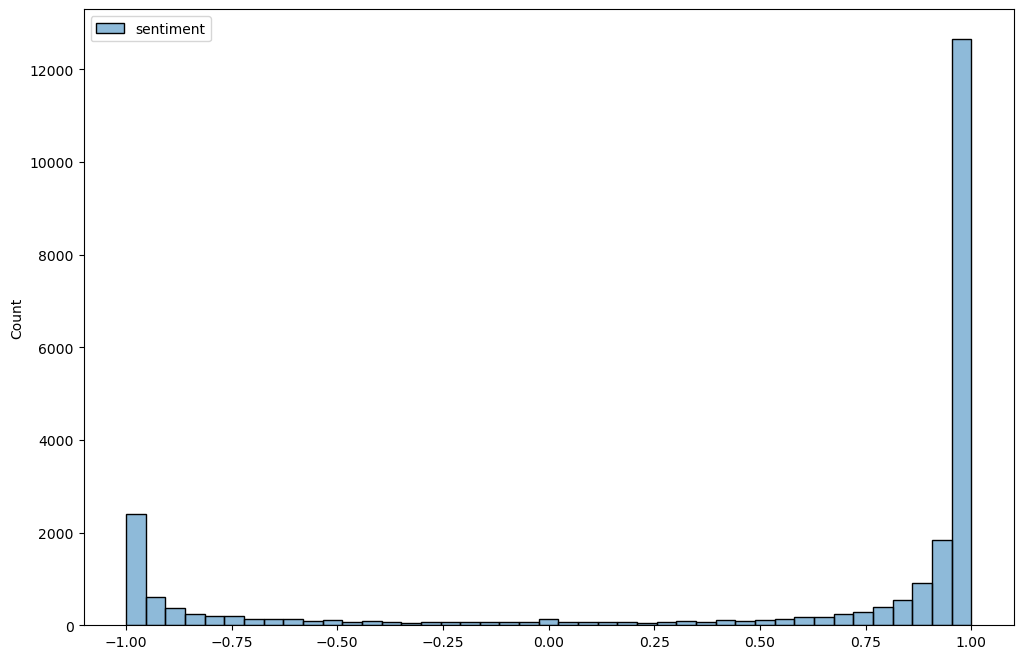

In [100]:
plt.figure(figsize=(12,8))
sns.histplot(df[['sentiment']])
plt.show()

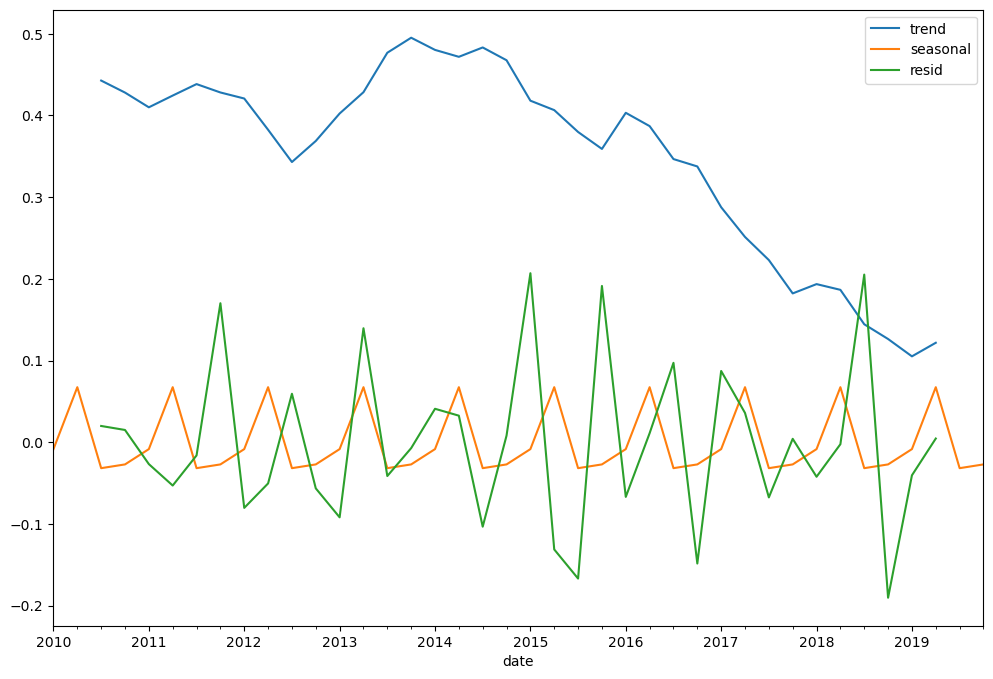

In [101]:
y = df['sentiment'][df.decade.isin([2010])].resample('Q').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({'y': result.observed,
                             'trend': result.trend,
                             'seasonal': result.seasonal,
                             'resid': result.resid,})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend', 'seasonal', 'resid']].plot(figsize=(12,8))
plt.show()

In [102]:
# decades = [str(decade) for decade in df.decade.unique()]
# colors = ['#0000ff', '#3300cc', '#660099', '#990066', '#cc0033', '#ff0000']

# gs = grid_spec.GridSpec(len(decades),1)
# fig = plt.figure(figsize=(16,9))

# i = 0

# ax_objs = []
# for decade in decades:
#     decade = decades[i]
#     x = np.array(df[df.decade == decade].sentiment)
#     x_d = np.linspace(0,1, 1000)

#     kde = KernelDensity(bandwidth=0.03, kernel='gaussian')
#     kde.fit(x[:, None])

#     logprob = kde.score_samples(x_d[:, None])

#     # creating new axes object
#     ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

#     # plotting the distribution
#     ax_objs[-1].plot(x_d, np.exp(logprob),color="#f0f0f0",lw=1)
#     ax_objs[-1].fill_between(x_d, np.exp(logprob), alpha=1,color=colors[i])


#     # setting uniform x and y lims
#     ax_objs[-1].set_xlim(0,1)
#     ax_objs[-1].set_ylim(0,2.5)

#     # make background transparent
#     rect = ax_objs[-1].patch
#     rect.set_alpha(0)

#     # remove borders, axis ticks, and labels
#     ax_objs[-1].set_yticklabels([])

#     if i == len(decades)-1:
#         ax_objs[-1].set_xlabel("Sentiment", fontsize=16,fontweight="bold")
#     else:
#         ax_objs[-1].set_xticklabels([])

#     spines = ["top","right","left","bottom"]
#     for s in spines:
#         ax_objs[-1].spines[s].set_visible(False)

#     adj_decade = decade.replace(" ","\n")
#     ax_objs[-1].text(-0.02,0,adj_decade,fontweight="bold",fontsize=14,ha="right")


#     i += 1

# gs.update(hspace=-0.7)

# fig.text(0.07,0.85,"Distribution of Aptitude Test Results from 18 – 24 year-olds",fontsize=20)

# plt.tight_layout()
# plt.show()

In [103]:
def ridgeline(data, overlap=0, fill=True, labels=None, n_points=150):
    """
    Creates a standard ridgeline plot.

    data, list of lists.
    overlap, overlap between distributions. 1 max overlap, 0 no overlap.
    fill, matplotlib color to fill the distributions.
    n_points, number of points to evaluate each distribution function.
    labels, values to place on the y axis to describe the distributions.
    """
    if overlap > 1 or overlap < 0:
        raise ValueError('overlap must be in [0 1]')
    xx = np.linspace(np.min(np.concatenate(data)),
                     np.max(np.concatenate(data)), n_points)
    curves = []
    ys = []
    for i, d in enumerate(data):
        pdf = gaussian_kde(d)
        y = i*(1.0-overlap)
        ys.append(y)
        curve = pdf(xx)
        if fill:
            plt.fill_between(xx, np.ones(n_points)*y, 
                             curve+y, zorder=len(data)-i+1, color=fill)
        plt.plot(xx, curve+y, c='k', zorder=len(data)-i+1)
    if labels:
        plt.yticks(ys, labels)

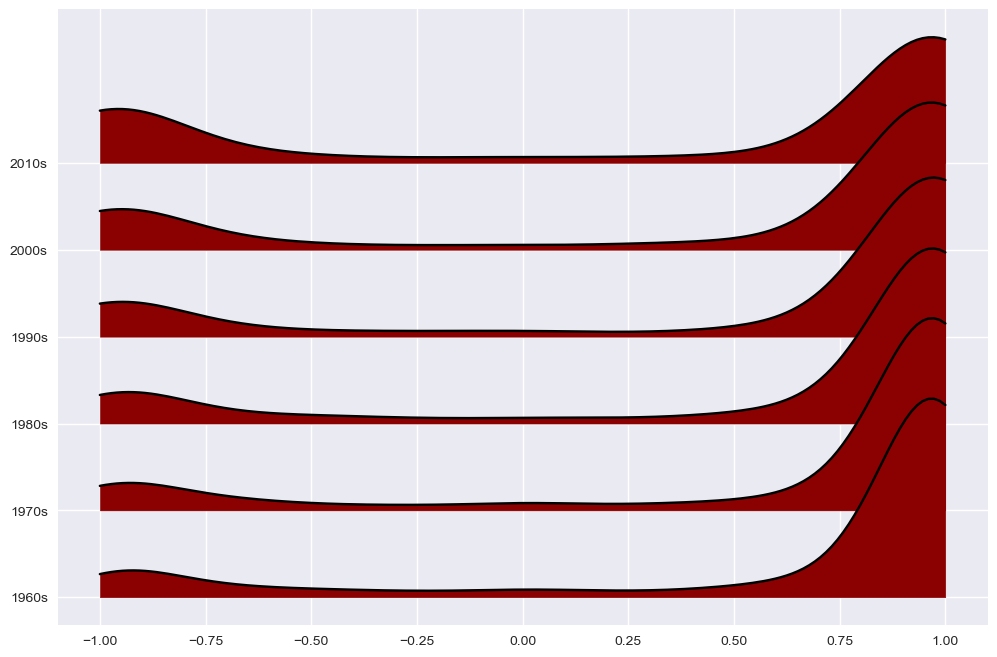

In [121]:
def sentiment_by_decade_ridgeplot(df):
    _60s = df[df.decade == 1960].sentiment.values
    _70s = df[df.decade == 1970].sentiment.values
    _80s = df[df.decade == 1980].sentiment.values
    _90s = df[df.decade == 1990].sentiment.values
    _00s = df[df.decade == 2000].sentiment.values
    _10s = df[df.decade == 2010].sentiment.values

    decades = [_60s, _70s, _80s, _90s, _00s, _10s]

    plt.figure(figsize=(12,8))
    ridgeline(decades, fill='darkred', labels=['1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])

sentiment_by_decade_ridgeplot(df)

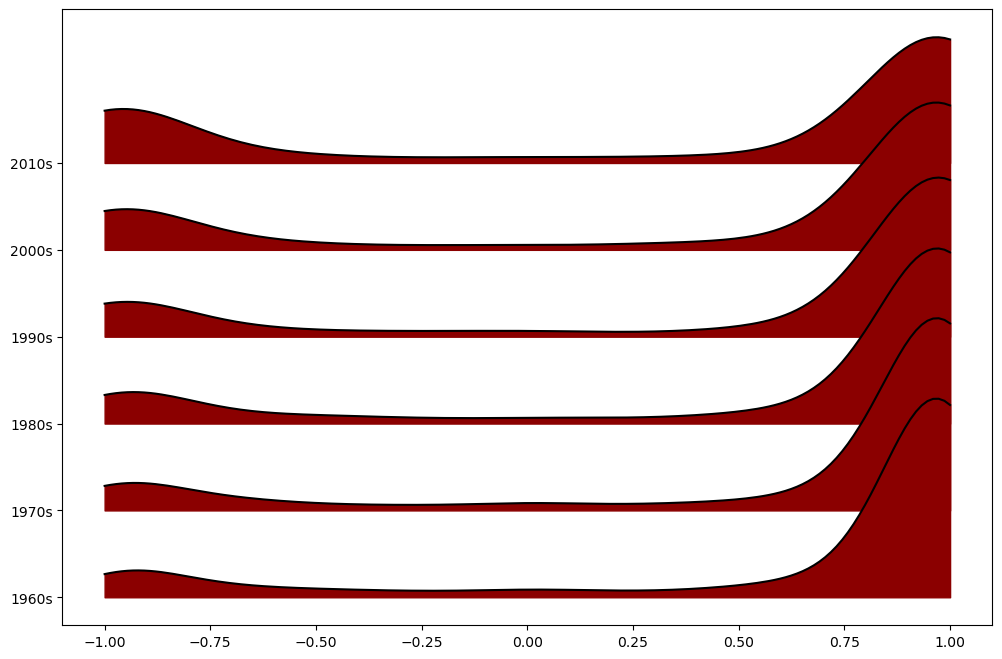

# Hypothesis Testing

It is evident from the visualization above that the distribution of sentiment in each decade is not a normal distribution - rather it is bimodal, with the majority of observations concentrated at the two extremes. Therefore, we will use the non-parametric hypothesis tests to compare means. Since we wee an overall trend of a decreasing average sentiment over time, we will compare the mean of each decade to the decade before it to determine the probability that the differences in sentiment are due to chance. We will also do a more general assessment of the correlation between average sentiment and time. 

In [106]:
df.head(1)

title artist                                             lyrics  \
date                                                                         
2001-10-20    #1  Nelly  uh uh uh got bring attention dirty better watc...   

                                                   raw_lyrics  decade  \
date                                                                    
2001-10-20  #1 LyricsUh uh uh I just gotta bring it to the...    2000   

            character_count  word_count  \
date                                      
2001-10-20             2014         363   

                                                 unique_words  \
date                                                            
2001-10-20  better stitch cocky dock til shorties total ye...   

            unique_words_count  sentiment  ...           place_words  \
date                                       ...                         
2001-10-20                 228     0.9915  ...  [hook] [hook] [hook]   

           chorus_count  verse_count  verse_chorus_ratio  pre_chorus_count  \
date                                                                         
2001-10-20            0            0                 0.0                 0   

            outro_count  bridge_count  hook_count  \
date                                                
2001-10-20            0             0           3   

                                                      bigrams  \
date                                                            
2001-10-20  [(uh, uh), (uh, uh), (uh, got), (got, bring), ...   

                                                     trigrams  
date                                                           
2001-10-20  [(uh, uh, uh), (uh, uh, got), (uh, got, bring)...  

[1 rows x 21 columns]

### Correlation between sentiment and date

In [ ]:
# converting date to an int (number of days from the first day in 
# the dataset)

first_day = df.index.min()
df2['n_days'] = (df.index - first_day) / pd.Timedelta('1 days')

In [ ]:
H0 = 'There is no linear correlation between average sentiment and date.'
H1 = 'There is a linear correlation between average sentiment and date.'
alpha = .05

r, p = stats.pearsonr(df2.sentiment, df2.n_days)

print(f'H0: {H0}')
print(f'H1: {H1}')
print()
print(f'r = {round(r, 2)}')
print(f'p = {round(p, 2)}')

if p < alpha:
    print(f'\nSince p is less than {alpha}, we reject the null hypothesis.') 
    print(f'We will proceed under the assumption that: {H1}')
else:
    print(f'\nSince p is not less than {alpha}, we fail to reject the null hypothesis.')
    print(f'We will proceed under the assumption that: {H0}')

### comparing mean sentiment score across the decades

In [ ]:
px.line(df[['sentiment']].resample('10Y').mean().dropna(), markers=True)

In [ ]:
sns.barplot(data=df, y='sentiment', x='decade', ci=None, ec='black')
plt.show()

#### 1960s vs 1970s

In [ ]:
H0 = 'The average sentiment in the 1970s is not less than the average sentiment in the 1960s.'
H1 = 'The average sentiment in the 1970s is less than the average sentiment in the 1960s.'

alpha = .05

stat, p = stats.mannwhitneyu(df[df.decade==1970].sentiment, 
                             df[df.decade==1960].sentiment)

print(f'Mean sentiment 1960s: {round(df[df.decade==1960].sentiment.mean(), 3)}')
print(f'Mean sentiment 1970s: {round(df[df.decade==1970].sentiment.mean(), 3)}')
print()
print(f'H0: {H0}')
print(f'H1: {H1}')
print()
print(f'stat = {round(stat, 3)}')
print(f'p/2 = {round(p/2, 4)}')

if p/2 < alpha:
    print(f'\nSince p/2 is less than {alpha}, we reject the null hypothesis.') 
    print(f'We will proceed under the assumption that: {H1}')
else:
    print(f'\nSince p/2 is not less than {alpha}, we fail to reject the null hypothesis.')
    print(f'We will proceed under the assumption that: {H0}')

#### 1970s vs 1980s

In [ ]:
H0 = 'The average sentiment in the 1980s is not less than the average sentiment in the 1970s.'
H1 = 'The average sentiment in the 1980s is less than the average sentiment in the 1970s.'

alpha = .05

stat, p = stats.mannwhitneyu(df[df.decade==1970].sentiment, 
                             df[df.decade==1980].sentiment)

print(f'Mean sentiment 1970s: {round(df[df.decade==1970].sentiment.mean(), 3)}')
print(f'Mean sentiment 1980s: {round(df[df.decade==1980].sentiment.mean(), 3)}')
print()
print(f'H0: {H0}')
print(f'H1: {H1}')
print()
print(f'stat = {round(stat, 3)}')
print(f'p/2 = {round(p/2, 3)}')

if p < alpha:
    print(f'\nSince p/2 is less than {alpha}, we reject the null hypothesis.') 
    print(f'We will proceed under the assumption that: {H1}')
else:
    print(f'\nSince p/2 is not less than {alpha}, we fail to reject the null hypothesis.')
    print(f'We will proceed under the assumption that: {H0}')

#### 1980s vs 1990s

In [ ]:
H0 = 'The average sentiment in the 1990s is not less than the average sentiment in the 1980s.'
H1 = 'The average sentiment in the 1990s is less than the average sentiment in the 1980s.'

alpha = .05

stat, p = stats.mannwhitneyu(df[df.decade==1980].sentiment, 
                             df[df.decade==1990].sentiment)

print(f'Mean sentiment 1980s: {round(df[df.decade==1980].sentiment.mean(), 2)}')
print(f'Mean sentiment 1990s: {round(df[df.decade==1990].sentiment.mean(), 2)}')
print()
print(f'H0: {H0}')
print(f'H1: {H1}')
print()
print(f'stat = {round(stat, 2)}')
print(f'p = {round(p/2, 2)}')

if p/2 < alpha:
    print(f'\nSince p/2 is less than {alpha}, we reject the null hypothesis.') 
    print(f'We will proceed under the assumption that: {H1}')
else:
    print(f'\nSince p/2 is not less than {alpha}, we fail to reject the null hypothesis.')
    print(f'We will proceed under the assumption that: {H0}')

In [ ]:
H0 = 'The average sentiment in the 2000s is not less than the average sentiment in the 1990s.'
H1 = 'The average sentiment in the 2000s is less than the average sentiment in the 1990s.'

alpha = .05

stat, p = stats.mannwhitneyu(df[df.decade==1990].sentiment,
                             df[df.decade==2000].sentiment)

print(f'Mean sentiment 1990s: {round(df[df.decade==1990].sentiment.mean(), 2)}')
print(f'Mean sentiment 2000s: {round(df[df.decade==2000].sentiment.mean(), 2)}')
print()
print(f'H0: {H0}')
print(f'H1: {H1}')
print()
print(f'stat = {round(stat, 2)}')
print(f'p/2 = {round(p/2, 2)}')

if p < alpha:
    print(f'\nSince p/2 is less than {alpha}, we reject the null hypothesis.') 
    print(f'We will proceed under the assumption that: {H1}')
else:
    print(f'\nSince p/2 is not less than {alpha}, we fail to reject the null hypothesis.')
    print(f'We will proceed under the assumption that: {H0}')

In [ ]:
H0 = 'The average sentiment in the 2010s is not less than the average sentiment in the 2000s.'
H1 = 'The average sentiment in the 2010s is less than the average sentiment in the 2000s.'

alpha = .05

stat, p = stats.mannwhitneyu(df[df.decade==2000].sentiment, 
                             df[df.decade==2010].sentiment)

print(f'Mean sentiment 2000s: {round(df[df.decade==2000].sentiment.mean(), 2)}')
print(f'Mean sentiment 2010s: {round(df[df.decade==2010].sentiment.mean(), 2)}')
print()
print(f'H0: {H0}')
print(f'H1: {H1}')
print()
print(f'stat = {round(stat, 2)}')
print(f'p/2 = {round(p/2, 2)}')

if p < alpha:
    print(f'\nSince p/2 is less than {alpha}, we reject the null hypothesis.') 
    print(f'We will proceed under the assumption that: {H1}')
else:
    print(f'\nSince p/2 is not less than {alpha}, we fail to reject the null hypothesis.')
    print(f'We will proceed under the assumption that: {H0}')

In [ ]:
df.groupby('decade').count()[['sentiment']]

In [ ]:
sns.histplot(df.sentiment)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Songs')
plt.show()